<a href="https://colab.research.google.com/github/Thivadee19/Machine-Learning_Advance-Data-Analytic_Assignment-/blob/main/Advertising_project_1_(Draft_1)_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Environment Set Up

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install pandas-profiling==2.7.1
import pandas_profiling as pp
pp.ProfileReport(df)

##I tried this from the code that we got from Shiana to see att info which very helpfull to sumarize adn analy the data. it's take some time to generate this to show as graph thing, if I like os far.  

     |████████████████████████████████| 252 kB 5.0 MB/s 
     |████████████████████████████████| 675 kB 40.1 MB/s 
     |████████████████████████████████| 4.7 MB 37.4 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 812 kB 36.0 MB/s 
     |████████████████████████████████| 38.2 MB 23 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=eb8b2fa48677d05ad6a5c16eebfa7fd845d69177ce258c92126cc9a307b7f113
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=eaa6442750a24649d3eb0efe905c82917fac3b52d09bceffa7cdb6675899224b
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
missing_values = ["n/a", "na", "--", "?"]
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')

In [9]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [10]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [11]:
df.shape

(1000, 10)

In [12]:
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [14]:
df = df.rename(columns={'Male':'gender'})

In [15]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [16]:
df.isna().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
gender                      False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

In [17]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'gender']]
#X = df[['Age', 'Daily Internet Usage']]
#x = df[['Daily Time Spent on Site', 'Age']]



##Daily Time Spent on Site	Age	Area Income	Daily Internet Usage	Male	Clicked on Ad

In [18]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [19]:
y = df[['Clicked on Ad']]

In [20]:
y.head()

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0


In [21]:
y.shape

(1000, 1)

In [22]:
X.shape

(1000, 5)

In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
logReg = LogisticRegression()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 5)
(250, 5)
(750, 1)
(250, 1)


In [28]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logReg.predict(x_test)

In [30]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1])

In [31]:
y_test.values[0:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [87]:
y_pred[0:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [92]:
logReg.score(x_test,y_test)

0.832

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test,y_pred)
## The result of the accuracy is 0.992. which mean there is almost 100% percent the model training. 

0.992

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[115,  11],
       [ 14, 110]])

In [40]:
from sklearn.metrics import classification_report

In [41]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 15.0, 'predicted value')

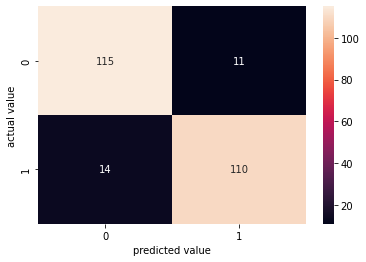

In [42]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

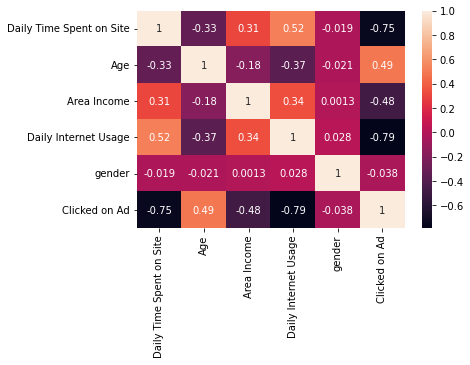

In [43]:
sns.heatmap(df.corr(),annot=True)

In [44]:
from sklearn import metrics

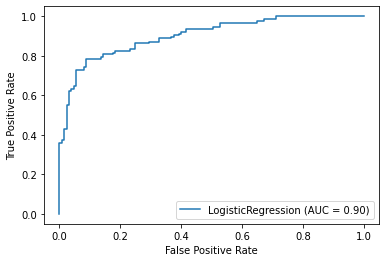

In [93]:
metrics.plot_roc_curve(logReg, x_test, y_test)
## AUC 0.90

### KNN Model 

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scalar = StandardScaler()

In [51]:
df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'], inplace=True)

In [52]:
scalar.fit(df.drop('Clicked on Ad', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [57]:
scaled_features = scalar.transform(df.drop('Clicked on Ad', axis=1))

In [59]:
std_data = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [60]:
std_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


In [61]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['Clicked on Ad'])

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 5)
(250, 5)
(750,)
(250,)


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)

In [70]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [71]:
y_pred = knn.predict(x_test)

In [72]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0])

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[122,   3],
       [  3, 122]])

In [75]:
score = knn.score(x_test,y_test)

In [76]:
score

0.976

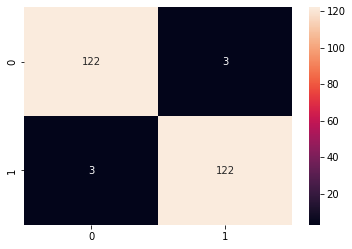

In [77]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.98      0.98      0.98       125

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [79]:
score = []


In [80]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy Score')

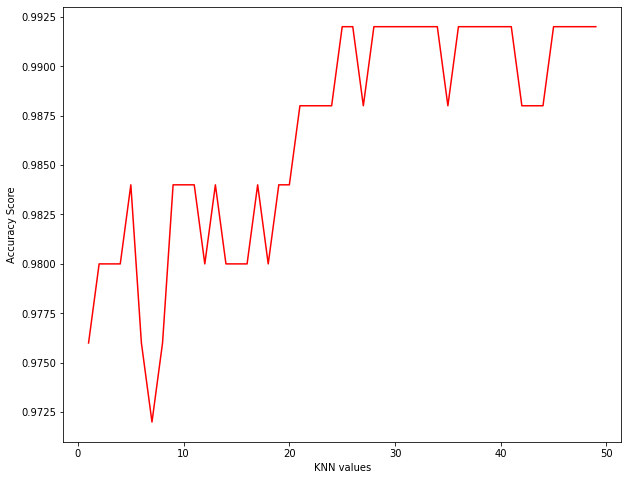

In [81]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

In [82]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

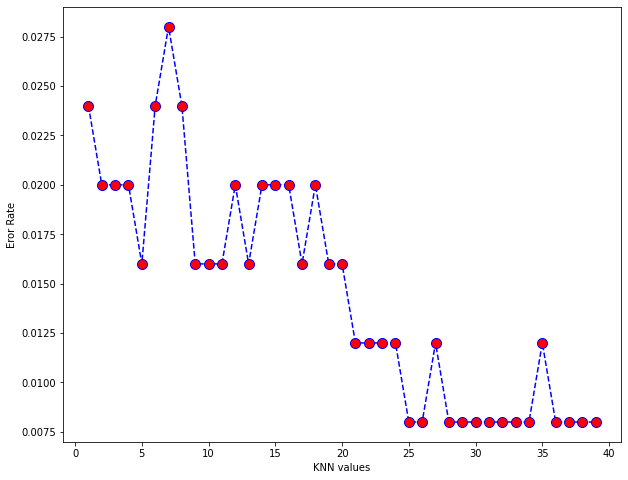

In [83]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 

### Conclusion #1- Average the daily time spent on site is around 65 and mean age is arounf 36, the daily internet usuage is 180.0001. that's surprise me a bit be cause it is around 3hour a da, very interesting to know.  and the average for the  income is around 55,000.- which have minimun 13,9660.- and maximun 79,484.8.- 

### Conclusion #2- First ML,  I tried with linear regression and got result at 0.992 which pretty high.so that mean out of 100 the model can predict it correctly 99%. Next, I tried with KNN which I got 0.5 and from the graph I can see that there is high accuracy around the are 25-50, although it's a bit up and down but the highest is around that area. also, I see the very law accuracy around 8 I think( betweem 0-1) so I checked the error rate the same area have highest error between 0-5.